# Quantum Teleportation Tutorial
This is a following-along of the [Xanadu quantum teleportation tutorial](https://strawberryfields.ai/photonics/demos/run_teleportation.html)

In [2]:
import strawberryfields as sf
from strawberryfields.ops import *

import numpy as np
from numpy import pi, sqrt

# set the random seed
np.random.seed(42)

In [3]:
# create the circuit with 3 modes: 
# two for Alice's and Bob's respective entangled particles,
# and another for the unknown particle that Alice "sends" to Bob
prog = sf.Program(3)

In [4]:
alpha = 1+0.5j
r = np.abs(alpha)
phi = np.angle(alpha)

with prog.context as q:
    Coherent(r, phi) | q[0]
    Squeezed(-2) | q[1]
    Squeezed(2) | q[2]
    
    BS = BSgate(pi/4, pi)
    BS | (q[1], q[2])
    BS | (q[0], q[2])
    
    MeasureX | q[0]
    MeasureP | q[1]
    
    # Cannot find documentation on q[i].par
    Xgate(sqrt(2) * q[0].par) | q[2]
    Zgate(sqrt(2) * q[1].par) | q[2]

In [5]:
eng = sf.Engine('fock', backend_options={"cutoff_dim": 15})

In [6]:
result = eng.run(prog, shots=1, modes=None, compile_options={})

In [7]:
state = result.state
print (state)

<FockState: num_modes=3, cutoff=15, pure=False, hbar=2>


In [8]:
result.samples

array([[0.19890199, 0.20450205]])

In [9]:
state.dm()

array([[[[[[ 3.88025761e-01-1.60208136e-17j,
            -3.02281613e-01+7.05742587e-02j,
             2.44292409e-01-7.90524141e-02j, ...,
             4.42592018e-03-8.23693916e-03j,
            -7.49903144e-05+2.47075636e-03j,
             3.21690490e-04-2.57930008e-04j],
           [-3.02281613e-01-7.05742587e-02j,
             2.48320883e-01+2.69397016e-17j,
            -2.04687877e-01+1.71517880e-02j, ...,
            -4.94603802e-03+5.61179035e-03j,
             5.07801314e-04-1.91114072e-03j,
            -2.97517203e-04+1.42424644e-04j],
           [ 2.44292409e-01+7.90524141e-02j,
            -2.04687877e-01-1.71517880e-02j,
             1.69906413e-01+1.07802942e-17j, ...,
             4.46457118e-03-4.28410225e-03j,
            -5.50578958e-04+1.54025562e-03j,
             2.55077225e-04-9.68490676e-05j],
           ...,
           [ 4.42592018e-03+8.23693916e-03j,
            -4.94603802e-03-5.61179035e-03j,
             4.46457118e-03+4.28410225e-03j, ...,
             2.2

In [10]:
state.dm().shape

(15, 15, 15, 15, 15, 15)

In [11]:
rho2 = np.einsum("kkllij->ij", state.dm())
rho2.shape

(15, 15)

In [12]:
probs = np.real_if_close(np.diagonal(rho2))
probs

array([3.88025761e-01, 2.48320883e-01, 1.69906413e-01, 9.28910186e-02,
       4.72722671e-02, 2.57184193e-02, 1.43765419e-02, 6.51509487e-03,
       2.72153026e-03, 1.70545372e-03, 1.45118037e-03, 8.46700533e-04,
       2.25335390e-04, 1.57470486e-05, 4.38147868e-07])

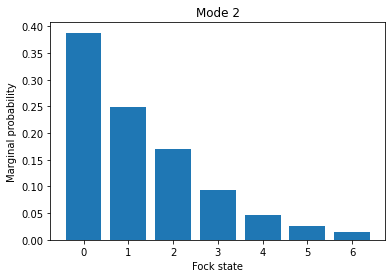

In [13]:
from matplotlib import pyplot as plt
plt.bar(range(7), probs[:7])
plt.xlabel('Fock state')
plt.ylabel('Marginal probability')
plt.title('Mode 2')
plt.show()